In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
df= pd.read_csv("avilla.csv", header= None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [6]:
df.columns=['Intercolumnar Distance','Upper Margin','Lower Margin','Exploitation','Row Number','Modular Ratio','Interlinear Spacing','Weight','Peak Number','Mod Rat/Inter Spacing','Class']

In [8]:
df.head()

,Intercolumnar Distance,Upper Margin,Lower Margin,Exploitation,Row Number,Modular Ratio,Interlinear Spacing,Weight,Peak Number,Mod Rat/Inter Spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [9]:
df.describe()

,Intercolumnar Distance,Upper Margin,Lower Margin,Exploitation,Row Number,Modular Ratio,Interlinear Spacing,Weight,Peak Number,Mod Rat/Inter Spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [10]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3)
    samples.append((X_train, X_test, y_train, y_test))

In [11]:
samples

[(       Intercolumnar Distance  Upper Margin  Lower Margin  Exploitation  \
  3896                 0.068573     -0.016448      0.274747     -0.036330   
  6493                 0.809204     -0.165620      0.025799      0.712127   
  2883                -0.227680      0.446772      0.534365      0.177429   
  2421                -0.227680     -0.251983      0.449011     -1.268911   
  4717                 0.093260     -0.385453      0.352988      0.546705   
  ...                       ...           ...           ...           ...   
  9897                -0.091897     -0.118513      0.189393      1.280303   
  10178                0.179667      2.660806      0.096927     -1.474226   
  5981                 0.624046     -0.189174      0.139604      0.387310   
  9251                 0.167323     -0.322644      0.306755     -0.543548   
  7957                 0.080916      0.077766      0.050694      0.857319   
  
         Row Number  Modular Ratio  Interlinear Spacing    Weight  Peak N

In [12]:
def fitnessfunction(X_train, X_test, y_train, y_test, kernel, c, gamma):
    model= svm.SVC( C= c, kernel= kernel, gamma=gamma)
    model.fit(X_train, y_train)
    print("fit")
    predicted = model.predict(X_test)
        
    # Model Evaluation Accuracy
    accuracy = round(np.mean(y_test == predicted) * 100, 2)
    return accuracy 

In [13]:
nsamples = 10
accuracies = []
params= []
iteration= 100

kernelList = ['linear', 'rbf', 'sigmoid']
df_sample= pd.DataFrame(columns=['sample#', 'best accuracy', 'c', 'gamma', 'kernel'])

for i in range(nsamples):
    bestC = 0 
    bestGamma = 0 
    bestAccuracy=0
    X_train, X_test, y_train, y_test = samples[i]
    
    print("Iterating on sample ", i+1)
    for j in range(1, iteration+1):
        print("iteration ",j)
        kernel= np.random.choice(kernelList)
        C = np.random.uniform(0,10)
        gamma = np.random.uniform(0, 10)
        print(kernel , C, gamma)
        accuracy= fitnessfunction(X_train, X_test, y_train, y_test, kernel, C, gamma)
        if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestC= C
                bestGamma= gamma
                bestKernel= kernel

                    
    accuracies.append(bestAccuracy)
    params.append([bestC, bestGamma, bestKernel])

    df_sample.loc[len(df_sample.index)] = [i+1, bestAccuracy, bestC, bestGamma, bestKernel]
    #print(f"Sample {i+1}: Best accuracy = {bestAccuracy}, Best params = {bestNu, bestEpsilon, bestKernel}")
print("Done iterating!\n")

Iterating on sample  1
iteration  1
rbf 9.784674987780063 6.6611100379539625
fit
iteration  2
rbf 2.4565953729898293 5.041200880053297
fit
iteration  3
sigmoid 6.804021819347341 4.3403583175878975
fit
iteration  4
linear 7.822263882794724 7.935806927708864
fit
iteration  5
rbf 9.740256458347382 9.6294425034051
fit
iteration  6
linear 3.8657314006271024 7.8515404972672584
fit
iteration  7
linear 4.987380254924093 6.724882312495697
fit
iteration  8
linear 3.4843596896289384 8.492533979762642
fit
iteration  9
linear 7.2173969256930715 5.778756246295721
fit
iteration  10
rbf 0.08592956632730409 1.466555577934704
fit
iteration  11
linear 6.80021325882988 0.21360401096568782
fit
iteration  12
linear 6.417578442772179 1.0830505169329585
fit
iteration  13
rbf 8.572979073916946 8.718576060651502
fit
iteration  14
sigmoid 3.921587392701098 3.7383369933392663
fit
iteration  15
linear 6.199503758927866 4.758990557383154
fit
iteration  16
linear 6.331750651059245 2.24582061172075
fit
iteration  17


In [14]:
print(df_sample)

   sample#  best accuracy         c     gamma kernel
0        1          80.22  6.638460  0.546304    rbf
1        2          78.56  7.039624  0.669728    rbf
2        3          79.03  7.811763  1.100195    rbf
3        4          79.03  6.462990  0.538638    rbf
4        5          78.14  2.854532  0.594305    rbf
5        6          76.00  5.349848  1.793638    rbf
6        7          79.96  9.557734  0.682776    rbf
7        8          78.56  5.274503  0.289842    rbf
8        9          78.65  8.758075  0.546032    rbf
9       10          78.17  8.219339  0.868471    rbf


In [15]:
X_train, X_test, y_train, y_test = samples[df_sample['best accuracy'].idxmax()]

In [16]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=df_sample['kernel'].iloc[df_sample['best accuracy'].idxmax()], 
                                                        C=df_sample['c'].iloc[df_sample['best accuracy'].idxmax()],
                                                        gamma=df_sample['gamma'].iloc[df_sample['best accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

c:\Users\akshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


In [17]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

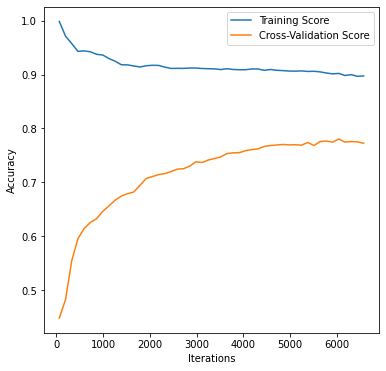

In [18]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()